Analyse mouse data as example

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scanpy as sc
from matplotlib.colors import ListedColormap
sns.set_context("poster")
sns.set_palette("colorblind")

#cmap = ListedColormap(sns.color_palette("colorblind").as_hex())
#sc.set_figure_params(scanpy=True, dpi=80, dpi_save=300, frameon=True, vector_friendly=True, fontsize=14, figsize=None, 
#color_map=cmap, format='png', facecolor=None, transparent=True, ipython_format='png2x')

# Load data

In [8]:
adata = ad.read_h5ad("../data/tasic.h5ad")
adata

AnnData object with n_obs × n_vars = 10534 × 45768
    obs: 'brain_region', 'brain_subregion', 'seq_batch', 'total_reads', 'percent_mt_exon_reads', 'class', 'subclass', 'subtype'

In [9]:
keep_subclasses = ['Pvalb', 'Sst', 'Lamp5', 'Sncg', 'Vip']
adata.obs['subclass'] = adata.obs['subclass'].astype("category")
extra_subclasses = [subclass for subclass in adata.obs['subclass'].cat.categories if subclass not in keep_subclasses]
adata.obs['subclass'] = adata.obs['subclass'].cat.remove_categories(['Serpinf1'])
adata.obs.loc[adata.obs['subclass'].isna(),'subclass'] = 'Vip'
adata = adata[adata.obs['subclass']!='Meis2']

In [10]:
adata.obs['Elfn1'] = np.array(adata[:,"Elfn1"].X[:,0])
subclass_order = adata.obs.groupby("subclass").mean().sort_values("Elfn1").index.to_numpy()[::-1]
adata.obs.drop(['Elfn1'], inplace=True, axis=1)
print(subclass_order)

/tmp/ipykernel_118512/3486609845.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Elfn1'] = np.array(adata[:,"Elfn1"].X[:,0])


['Sst' 'Vip' 'Sncg' 'Pvalb' 'Lamp5']


/tmp/ipykernel_118512/3486609845.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subclass_order = adata.obs.groupby("subclass").mean().sort_values("Elfn1").index.to_numpy()[::-1]


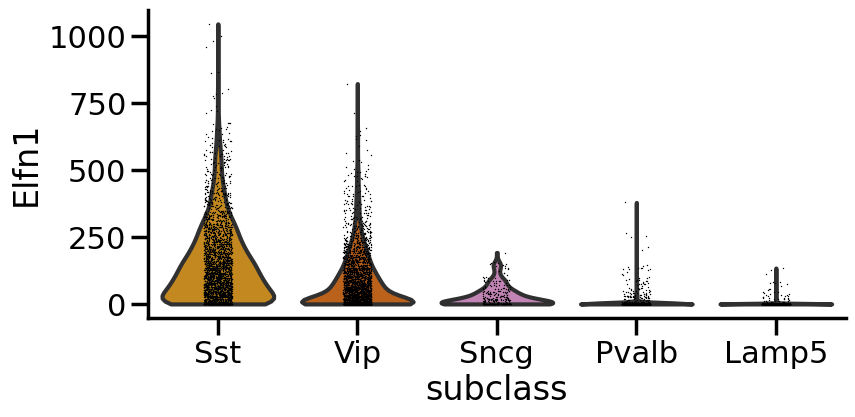

In [11]:
fig, ax = plt.subplots(figsize=(9,4))
sns.despine()
sc.pl.violin(adata, "Elfn1", "subclass", order=subclass_order, ax=ax)


Now make the UMAP

In [13]:
sc.pp.normalize_total(adata, 1e4)
sc.pp.log1p(adata)

In [16]:
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata)

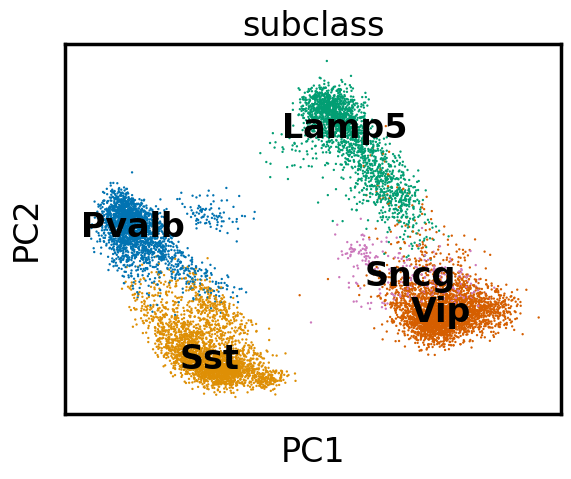

In [17]:
sc.pl.pca(adata, color='subclass', legend_loc='on data')

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/home/joram/anaconda3/envs/elfn1_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [19]:
sc.tl.umap(adata)

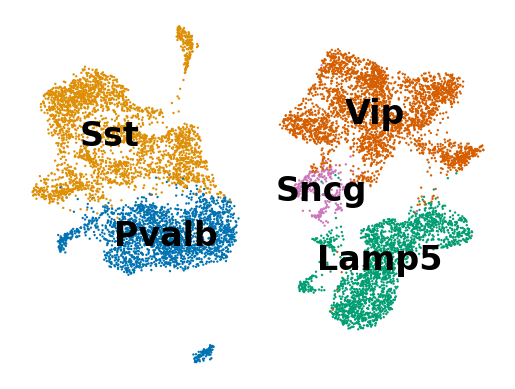

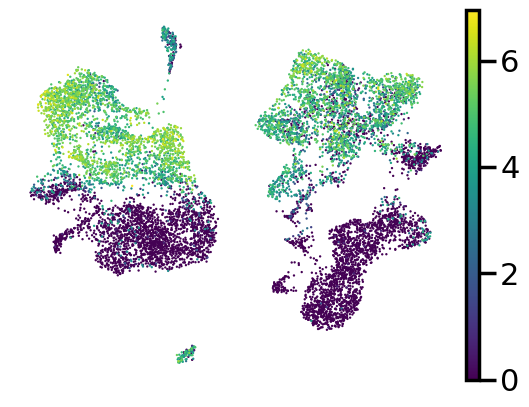

In [ ]:
sc.pl.umap(adata, color='subclass', legend_loc='on data', frameon=False, title='')
sc.pl.umap(adata, color='Elfn1', legend_loc='on data', frameon=False, title='')

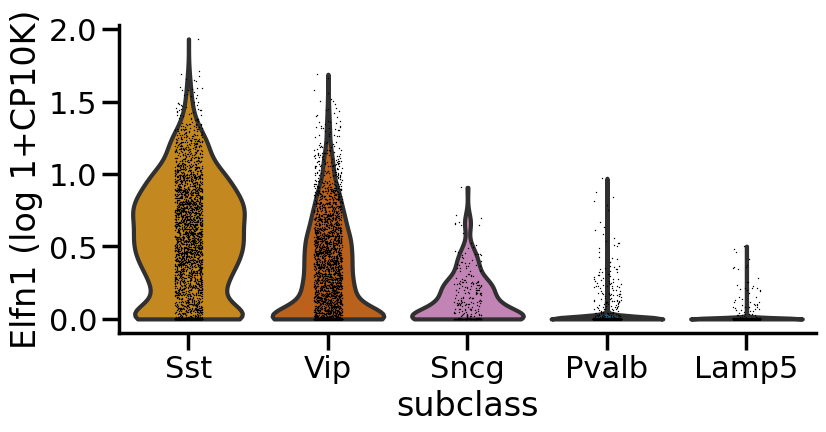

In [20]:
fig, ax = plt.subplots(figsize=(9,4))
sns.despine()
sc.pl.violin(adata, "Elfn1", "subclass", order=subclass_order, ax=ax, ylabel="Elfn1 (log 1+CP10K)")